In [1]:
from __future__ import division
# Add the root path for packages I made
import os, sys  
sys.path.append(os.getcwd() + '/..')
#
from supports._setting import trips_dir
from supports.logger import logging_msg
from supports._setting import DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP
from supports._setting import CENT, MINUTE
#
import datetime, time, csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
#

Populating the interactive namespace from numpy and matplotlib


In [2]:
trip_df = pd.read_csv('%s/whole-ap-tm-num-dur-fare.csv' % (trips_dir))
gb = trip_df.groupby('ap-trip-mode')

In [3]:
ap_in_num = gb.sum()['num-tm'][DInAP_PInAP] + gb.sum()['num-tm'][DOutAP_PInAP]
ap_in_fare = (gb.sum()['total-fare'][DInAP_PInAP] + gb.sum()['total-fare'][DOutAP_PInAP]) / CENT
ap_in_dur = (gb.sum()['total-dur'][DInAP_PInAP] + gb.sum()['total-dur'][DOutAP_PInAP]) / MINUTE
#
ap_in_fare_per_trip = ap_in_fare / ap_in_num
ap_in_dur_per_trip = ap_in_dur / ap_in_num
#
ap_out_num = gb.sum()['num-tm'][DInAP_POutAP] + gb.sum()['num-tm'][DOutAP_POutAP]
ap_out_fare = (gb.sum()['total-fare'][DInAP_POutAP] + gb.sum()['total-fare'][DOutAP_POutAP]) / CENT
ap_out_dur = (gb.sum()['total-dur'][DInAP_POutAP] + gb.sum()['total-dur'][DOutAP_POutAP]) / MINUTE
#
ap_out_fare_per_trip = ap_out_fare / ap_out_num
ap_out_dur_per_trip = ap_out_dur / ap_out_num

In [4]:
print ap_in_fare_per_trip, ap_out_fare_per_trip
print ap_in_dur_per_trip, ap_out_dur_per_trip

20.8059890533 10.3944424288
21.3838292714 14.2372090402


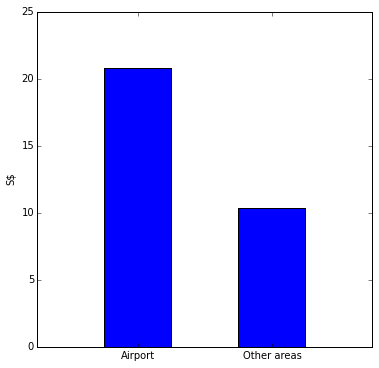

In [5]:
data = [ap_in_fare_per_trip, ap_out_fare_per_trip]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ind = np.arange(len(data))
width = 0.5  # the width of the bars
ax.bar(ind, data, width, color='blue')
ax.set_xlim(-width, len(ind))
ax.set_ylabel('S$')
plt.xticks(ind+width/2, ['Airport', 'Other areas'])
plt.savefig('fare_per_trip.pdf')
plt.show()

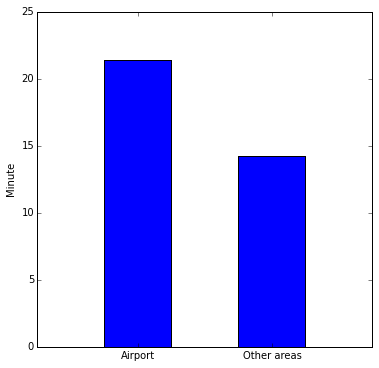

In [6]:
data = [ap_in_dur_per_trip, ap_out_dur_per_trip]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ind = np.arange(len(data))
width = 0.5  # the width of the bars
ax.bar(ind, data, width, color='blue')
ax.set_xlim(-width, len(ind))
ax.set_ylabel('Minute')
plt.xticks(ind+width/2, ['Airport', 'Other areas'])
plt.savefig('dur_per_trip.pdf')
plt.show()